## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 確認硬體資源
"""
Your code here
"""


In [1]:
import os
import keras

# Try to enable GPU (optional)


C:\Users\K258\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = 2*(((x - x.min()) / (x.max() - x.min()))-0.5)
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y 

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
"""
Your code here
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 128, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total para

In [9]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [10]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [11]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 41s 824us/step - loss: 1.6879 - acc: 0.3999 - val_loss: 1.5329 - val_acc: 0.4512
Epoch 2/100
50000/50000 [==============================] - 24s 481us/step - loss: 1.4603 - acc: 0.4830 - val_loss: 1.4592 - val_acc: 0.4851
Epoch 3/100
50000/50000 [==============================] - 23s 463us/step - loss: 1.3494 - acc: 0.5228 - val_loss: 1.4218 - val_acc: 0.4926
Epoch 4/100
50000/50000 [==============================] - 24s 481us/step - loss: 1.2535 - acc: 0.5562 - val_loss: 1.3994 - val_acc: 0.5087
Epoch 5/100
50000/50000 [==============================] - 24s 478us/step - loss: 1.1740 - acc: 0.5839 - val_loss: 1.3574 - val_acc: 0.5292
Epoch 6/100
50000/50000 [==============================] - 24s 472us/step - loss: 1.1015 - acc: 0.6110 - val_loss: 1.3467 - val_acc: 0.5345
Epoch 7/100
50000/50000 [==============================] - 24s 477us/step - loss: 1.0169 - acc: 0.6384 - val_l

Epoch 59/100
50000/50000 [==============================] - 31s 623us/step - loss: 0.1022 - acc: 0.9662 - val_loss: 3.5966 - val_acc: 0.5276
Epoch 60/100
50000/50000 [==============================] - 31s 627us/step - loss: 0.1070 - acc: 0.9647 - val_loss: 3.5135 - val_acc: 0.5300
Epoch 61/100
50000/50000 [==============================] - 35s 693us/step - loss: 0.0803 - acc: 0.9739 - val_loss: 3.7208 - val_acc: 0.5279
Epoch 62/100
50000/50000 [==============================] - 33s 668us/step - loss: 0.1204 - acc: 0.9608 - val_loss: 3.4993 - val_acc: 0.5378
Epoch 63/100
50000/50000 [==============================] - 33s 659us/step - loss: 0.1003 - acc: 0.9672 - val_loss: 3.5630 - val_acc: 0.5347
Epoch 64/100
50000/50000 [==============================] - 34s 684us/step - loss: 0.1085 - acc: 0.9644 - val_loss: 3.6200 - val_acc: 0.5344
Epoch 65/100
50000/50000 [==============================] - 33s 656us/step - loss: 0.1057 - acc: 0.9653 - val_loss: 3.6450 - val_acc: 0.5228
Epoch 66/100


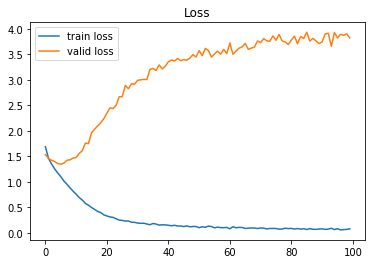

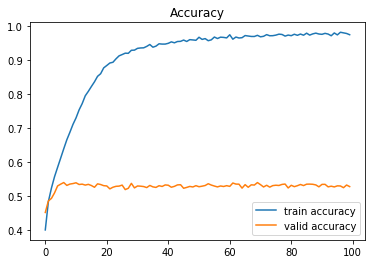

In [13]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()